In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rSquared
from keras.models import Sequential
from keras.layers import Conv2D, Dense

In [2]:
path='new_CNN_Datacube.pkl'

In [3]:
with open(path,'rb') as f:
    data = pickle.load(f)

In [4]:
(data[10][0])

{'Image': array([[[ 87,  94,  99, 255],
         [ 76,  81,  97, 255],
         [ 72,  79,  95, 255],
         ...,
         [ 87, 101,  98, 255],
         [ 81,  90,  93, 255],
         [ 80,  84,  91, 255]],
 
        [[111, 105, 101, 255],
         [106,  94,  96, 255],
         [ 91,  77,  91, 255],
         ...,
         [ 86, 110, 102, 255],
         [ 84, 103,  97, 255],
         [ 80,  78,  91, 255]],
 
        [[118, 106, 102, 255],
         [113,  92,  98, 255],
         [106,  85,  94, 255],
         ...,
         [ 84, 105, 105, 255],
         [ 92, 101, 105, 255],
         [ 96,  88,  98, 255]],
 
        ...,
 
        [[ 60,  81,  90, 255],
         [ 68,  84,  99, 255],
         [ 71,  82, 106, 255],
         ...,
         [135, 119, 117, 255],
         [146, 122, 118, 255],
         [120, 107, 107, 255]],
 
        [[ 63,  79,  98, 255],
         [ 66,  83,  99, 255],
         [ 70,  80,  97, 255],
         ...,
         [128, 110, 114, 255],
         [148, 110, 115, 2

In [5]:
NearRoad_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        NearRoad_lst.append(j['Near_road'])

len(NearRoad_lst)

1422

In [6]:
UrbanIndex_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        UrbanIndex_lst.append(j['Urban_index'])

len(UrbanIndex_lst)

1422

In [7]:
GreenIndex_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        GreenIndex_lst.append(j['Green_index'])

len(GreenIndex_lst)

1422

In [8]:
PM_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        PM_lst.append(j['PM'])

len(PM_lst)


1422

In [9]:
Image_lst = []
image_size = 224
count = 0
for i in data:
    for j in i:
        count = count +1
        Image_lst.append(j['Image'][:,:,:3])
        #print(count," ",j['PM'])
        #print(Imagess)

Imagearr = np.array(Image_lst)
Scaled_imageset=Imagearr*(1./255)


In [10]:
## Train-Test Split
dataset = list(zip(Scaled_imageset,PM_lst,GreenIndex_lst,UrbanIndex_lst,NearRoad_lst))

###shuffle dataset to get train, test datasets
random.Random(42).shuffle(dataset)
#random.shuffle(dataset)
batch_size = 100
total_batches = len(dataset) // batch_size
train_batches = int(np.ceil(0.8 * total_batches))
test_batches = total_batches - train_batches
train, test = dataset[:train_batches*batch_size], dataset[train_batches*batch_size:]



In [11]:
(test[4][0]*(1.*255)).astype('uint8')

array([[[126,  97,  96],
        [115, 104,  91],
        [131, 113,  92],
        ...,
        [112, 102,  91],
        [ 97,  89,  89],
        [ 96,  87,  80]],

       [[118,  93,  85],
        [115,  91,  81],
        [131, 105,  91],
        ...,
        [155, 128, 129],
        [131, 113, 116],
        [105, 100,  94]],

       [[109,  89,  81],
        [113,  80,  73],
        [119,  87,  76],
        ...,
        [206, 173, 165],
        [179, 151, 141],
        [138, 129, 110]],

       ...,

       [[100,  80,  72],
        [136, 101,  93],
        [ 87,  86,  72],
        ...,
        [ 97,  72,  67],
        [103,  68,  70],
        [ 83,  79,  68]],

       [[ 81,  91,  69],
        [111,  87,  81],
        [ 96,  85,  76],
        ...,
        [ 86,  65,  58],
        [103,  69,  67],
        [119,  88,  81]],

       [[ 89,  97,  81],
        [ 97,  81,  76],
        [ 92,  70,  77],
        ...,
        [112,  80,  78],
        [127,  89,  75],
        [127,  96,  73]]

In [12]:
(test[5][0]*(1.*255)).astype('uint8')

array([[[50, 89, 69],
        [51, 79, 65],
        [52, 75, 58],
        ...,
        [88, 87, 77],
        [38, 56, 63],
        [35, 56, 60]],

       [[48, 85, 65],
        [48, 80, 60],
        [44, 83, 64],
        ...,
        [60, 75, 69],
        [40, 52, 48],
        [36, 44, 44]],

       [[46, 77, 54],
        [44, 80, 52],
        [48, 91, 58],
        ...,
        [51, 62, 48],
        [51, 60, 48],
        [40, 46, 42]],

       ...,

       [[73, 83, 71],
        [76, 83, 71],
        [75, 81, 59],
        ...,
        [28, 44, 50],
        [24, 44, 40],
        [27, 47, 42]],

       [[73, 87, 68],
        [77, 85, 68],
        [81, 79, 72],
        ...,
        [30, 56, 56],
        [28, 44, 48],
        [25, 36, 42]],

       [[79, 77, 71],
        [81, 81, 73],
        [95, 85, 75],
        ...,
        [31, 70, 52],
        [30, 44, 54],
        [27, 38, 54]]], dtype=uint8)

In [13]:
X_train_img = np.array([item[0] for item in train]).reshape(-1,image_size,image_size,3)
X_test_img = np.array([item[0] for item in test]).reshape(-1,image_size,image_size,3)

y_train = np.array([item[1] for item in train]).reshape(-1)
y_test = np.array([item[1] for item in test]).reshape(-1)

X_train_auxiliary1 = np.array([item[2] for item in train]).reshape((len(train)),1)
X_test_auxiliary1= np.array([item[2] for item in test]).reshape((len(test)),1)

X_train_auxiliary2 = np.array([item[3] for item in train]).reshape((len(train)),1)
X_test_auxiliary2= np.array([item[3] for item in test]).reshape((len(test)),1)

X_train_auxiliary3 = np.array([item[4] for item in train]).reshape((len(train)),1)
X_test_auxiliary3= np.array([item[4] for item in test]).reshape((len(test)),1)

In [14]:
np.array(X_train_img).shape


(1200, 224, 224, 3)

In [15]:
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, LSTM, concatenate,MaxPooling2D,Dropout

image_input=Input(shape=(224,224,3))
x=Conv2D(20, (8,8), padding='same', activation='relu', input_shape=(224, 224, 3))(image_input)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(40, (4,4), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x=Conv2D(40, (4,4), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(80,  (4,4), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(100,  (4,4), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(200, (4,4), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(200,  (2, 2), padding='same', activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x=Conv2D(400, (2, 2), padding='same', activation='relu')(x)

x=Dropout(0.5)(x)

x=Flatten()(x)


auxiliary_input1=Input(shape=(1,))
auxiliary_input2=Input(shape=(1,))
auxiliary_input3=Input(shape=(1,))

combined_input=concatenate([x,auxiliary_input1,auxiliary_input2,auxiliary_input3])

x=Dense(200, activation='relu')(combined_input)
x=Dense(100, activation='relu')(x)
x=Dense(100, activation='relu')(x)
z=Dense(1, activation='linear')(x)


model = Model(inputs=[image_input,auxiliary_input1,auxiliary_input2,auxiliary_input3], outputs=z)


In [16]:

'''model = Sequential([
  layers.Conv2D(8, (4, 4), padding='same', activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(8, (4, 4), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(16, (2, 2), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(32,  (2, 2), padding='same', activation='relu'),
  layers.Conv2D(64,  (2, 2), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(128,  (2, 2), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(128,  (2, 2), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Conv2D(256, (2, 2), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear'),


])

'''

"model = Sequential([\n  layers.Conv2D(8, (4, 4), padding='same', activation='relu', input_shape=(224, 224, 3)),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(8, (4, 4), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(16, (2, 2), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(32,  (2, 2), padding='same', activation='relu'),\n  layers.Conv2D(64,  (2, 2), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(128,  (2, 2), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(128,  (2, 2), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Conv2D(256, (2, 2), padding='same', activation='relu'),\n  layers.MaxPooling2D(pool_size=(2, 2), strides=2),\n  layers.Dropout(0.3),\n  layers.Flatten(),\n  layers.

In [17]:
model.compile(loss='mae',optimizer='Adam')
early_stop = EarlyStopping(monitor='loss', patience=35, verbose=1)

In [18]:
epochsize = 100
#model = model.fit(X_train, y_train, validation_split= 0.1,epochs=10, batch_size = 100, callbacks=[early_stop],verbose= 1,shuffle=False)
history = model.fit(x=[X_train_img,X_train_auxiliary1,X_train_auxiliary2,X_train_auxiliary3], y=y_train, validation_split= 0.1,epochs=epochsize, batch_size=100, callbacks=[early_stop],verbose= 1,shuffle=False)

Epoch 1/100

11/11 [==============================] - 38s 3s/step - loss: 9.9912 - val_loss: 10.1860
Epoch 2/100
11/11 [==============================] - 28s 3s/step - loss: 7.2641 - val_loss: 7.1159
Epoch 3/100
11/11 [==============================] - 28s 3s/step - loss: 6.1092 - val_loss: 6.2027
Epoch 4/100
11/11 [==============================] - 28s 3s/step - loss: 5.8606 - val_loss: 6.1257
Epoch 5/100
11/11 [==============================] - 29s 3s/step - loss: 5.7296 - val_loss: 6.1320
Epoch 6/100
11/11 [==============================] - 29s 3s/step - loss: 5.6630 - val_loss: 5.9734
Epoch 7/100
11/11 [==============================] - 29s 3s/step - loss: 5.4848 - val_loss: 5.9555
Epoch 8/100
11/11 [==============================] - 33s 3s/step - loss: 5.2886 - val_loss: 5.2752
Epoch 9/100
11/11 [==============================] - 37s 3s/step - loss: 5.3483 - val_loss: 5.4967
Epoch 10/100
11/11 [==============================] - 37s 3s/step - loss: 5.1930 - val_loss: 5.2342
Epoch 1

11/11 [==============================] - 30s 3s/step - loss: 1.7363 - val_loss: 4.2004
Epoch 81/100
11/11 [==============================] - 30s 3s/step - loss: 1.9190 - val_loss: 4.2399
Epoch 82/100
11/11 [==============================] - 29s 3s/step - loss: 1.8264 - val_loss: 3.9068
Epoch 83/100
11/11 [==============================] - 30s 3s/step - loss: 2.1220 - val_loss: 3.7716
Epoch 84/100
11/11 [==============================] - 30s 3s/step - loss: 2.2174 - val_loss: 3.6596
Epoch 85/100
11/11 [==============================] - 29s 3s/step - loss: 1.9794 - val_loss: 3.7543
Epoch 86/100
11/11 [==============================] - 30s 3s/step - loss: 1.8547 - val_loss: 3.8710
Epoch 87/100
11/11 [==============================] - 29s 3s/step - loss: 1.8512 - val_loss: 4.0369
Epoch 88/100
11/11 [==============================] - 31s 3s/step - loss: 1.9827 - val_loss: 3.9329
Epoch 89/100
11/11 [==============================] - 34s 3s/step - loss: 1.8206 - val_loss: 3.6978
Epoch 90/100


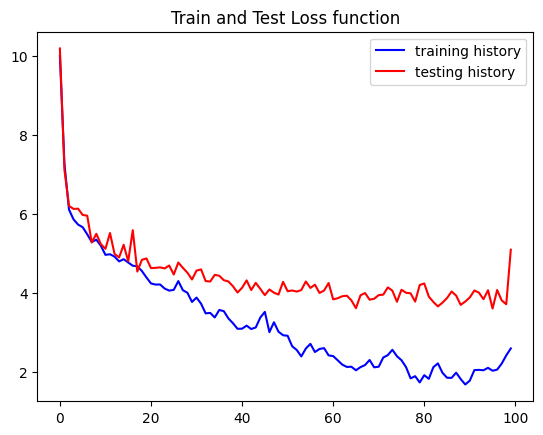

In [19]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'],'b', label='training history')
pyplot.plot(history.history['val_loss'],'r',label='testing history')
pyplot.title("Train and Test Loss function")
pyplot.legend()
pyplot.show()

In [20]:
loss = model.evaluate([X_test_img,X_test_auxiliary1,X_test_auxiliary2,X_test_auxiliary3],y_test)
#accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 165ms/step - loss: 4.7142


In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 20)         3860      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 20)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 40)         12840     ['max_pooling2d[0][0]']   

In [22]:
from sklearn.metrics import mean_absolute_percentage_error as mape

y_pred1 = model.predict([X_test_img,X_test_auxiliary1,X_test_auxiliary2,X_test_auxiliary3])
y_pred = y_pred1.reshape(-1)
MAE=mae(y_test,y_pred)
RMSE=mse(y_test,y_pred,squared=False)
MAPE=mape(y_test,y_pred)
R2=rSquared(y_test,y_pred)

print("Mean Absolute Error:", MAE)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Precentage Error",MAPE)
print("Coefficient of determination ",R2)

7/7 [==============================] - 1s 162ms/step
Mean Absolute Error: 4.714158337567303
Root Mean Squared Error: 6.878636580133851
Mean Absolute Precentage Error 0.5099462100556585
Coefficient of determination  0.29452900220130107


In [23]:
import datetime
x=datetime.datetime.now()
model_name=("{}_{}_{}_{}.hdf5".format(x.month,x.day,x.hour,x.minute))

model.save('/kaggle/working/'+model_name)

C:\Users\LAPTOP-ISHAN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


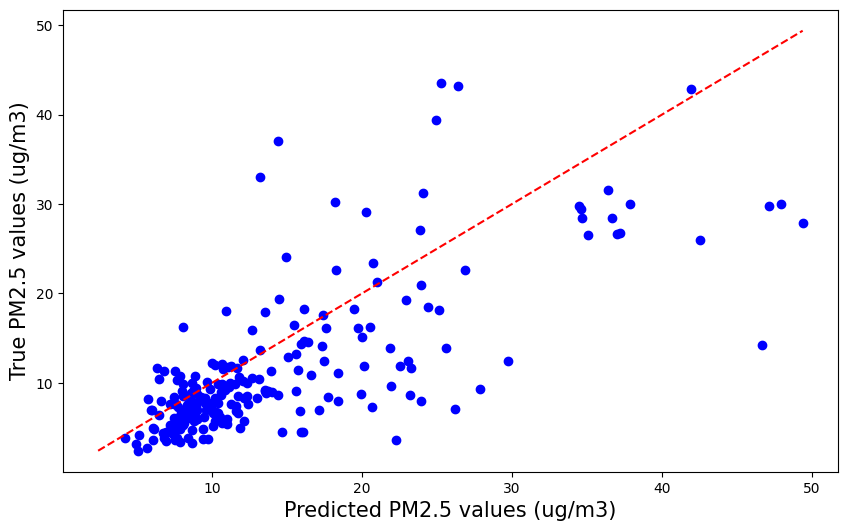

In [24]:
plt.figure(figsize=(10, 6))

# Plotting y_test values
plt.scatter(y_pred, y_test, c='blue', label='True Values')

max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red',linestyle='dashed',label='Reference line')


plt.xlabel('Predicted PM2.5 values (ug/m3)', fontsize=15)
plt.ylabel('True PM2.5 values (ug/m3)', fontsize=15)
#plt.legend()
#plt.title("Scatter plot of Predicted Vs True PM2.5 Concentrations")
plt.show()
